In [1]:
1+1

2

In [2]:
# Let us use a Nifti file that is shipped with nilearn
from nilearn.datasets import MNI152_FILE_PATH

# Note that the variable MNI152_FILE_PATH is just a path to a Nifti file
print('Path to MNI152 template: %r' % MNI152_FILE_PATH)

Path to MNI152 template: '/home/cp983411/anaconda3/envs/neuroimaging/lib/python3.7/site-packages/nilearn/datasets/data/avg152T1_brain.nii.gz'


In [4]:
import nilearn


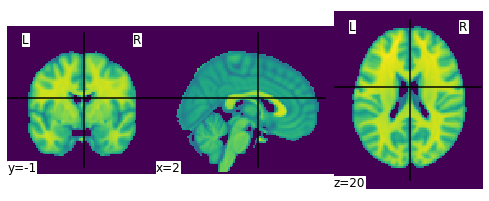

In [5]:
from nilearn import plotting
plotting.plot_img(MNI152_FILE_PATH)

In [6]:
from nilearn import image
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=3)

# While we are giving a file name as input, the function returns
# an in-memory object:
smooth_anat_img

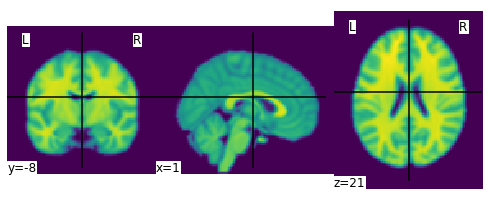

In [7]:
plotting.plot_img(smooth_anat_img)


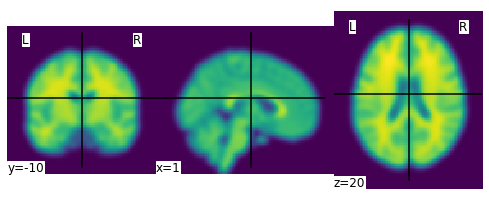

In [8]:
from nilearn import image
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=8)

# While we are giving a file name as input, the function returns
# an in-memory object:
plotting.plot_img(smooth_anat_img)

In [9]:
from nilearn.datasets import fetch_spm_auditory
subject_data = fetch_spm_auditory()
subject_data.func  # print the list of names of functional images

['/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_004.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_005.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_006.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_007.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_008.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_009.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_010.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_011.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_012.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_013.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_014.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_015.img',
 '/home/cp983411/nilearn_data/spm_auditory/sub001/fM00223/fM00223_016.img',
 '/home/cp98

In [10]:
from numpy import array
conditions = {
    'active': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.]),
    'rest':   array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.]),
}


In [11]:
active_minus_rest = conditions['active'] - conditions['rest']

In [12]:
active_minus_rest

array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

In [13]:
from nilearn.datasets import fetch_localizer_contrasts
n_subjects = 16
data = fetch_localizer_contrasts(["left vs right button press"], n_subjects,
                                 get_tmaps=True)

 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (4 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (4 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)
/home/cp983411/.local/lib/python3.7/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


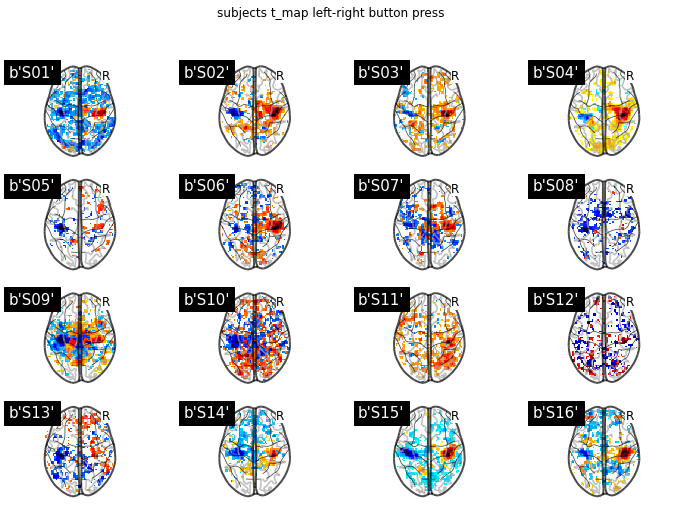

In [15]:
from nilearn import plotting
import matplotlib.pyplot as plt
subjects = [subject_data[0] for subject_data in data['ext_vars']]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12,8))
for cidx, tmap in enumerate(data['tmaps']):
    plotting.plot_glass_brain(tmap, colorbar=False, threshold=2.0,
                              title=subjects[cidx],
                              axes=axes[int(cidx / 4), int(cidx % 4)],
                              plot_abs=False, display_mode='z')
fig.suptitle('subjects t_map left-right button press')
plt.show()

In [16]:
from scipy.stats import norm
p_val = 0.001
p001_unc = norm.isf(p_val)

In [17]:
p001_unc

3.090232306167813

In [21]:
n=10000
p=.001
1-(1-p)**n

0.09520785288629108